In [ ]:
# Upload file từ máy tính
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Đọc dữ liệu
import pandas as pd

data = pd.read_csv('UCI_Credit_Card.csv')
print(data.head())


In [ ]:
# Kiểm tra các giá trị bị thiếu
print(data.isnull().sum())

# Nếu không có missing values thì bỏ qua. Nếu có thì có thể fillna hoặc xóa dòng.
# Ở file này thường là sạch rồi, không cần xử lý nhiều.

# Xử lý ngoại lệ (outlier) đơn giản: lọc tuổi bất hợp lý
data = data[(data['AGE'] > 18) & (data['AGE'] < 100)]

# Đổi tên cột mục tiêu từ 'default.payment.next.month' thành 'DEFAULT'
data = data.rename(columns={'default.payment.next.month': 'DEFAULT'})


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [ ]:
# Nếu cần, có thể mã hóa các biến như SEX, EDUCATION, MARRIAGE
# Ở đây các biến này đã là dạng số nên không cần encode thêm.

# Kiểm tra lại các cột
print(data.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('DEFAULT', axis=1)  # Các biến đầu vào
y = data['DEFAULT']               # Biến mục tiêu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import thư viện
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1. Chuẩn hóa dữ liệu cho Logistic Regression
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit_transform với dữ liệu train
X_test_scaled = scaler.transform(X_test)         # transform với dữ liệu test

# -----------------------------
# 2. Logistic Regression trên dữ liệu chuẩn hóa
logreg = LogisticRegression(max_iter=1000)  # Để mặc định 1000 là đủ
logreg.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_logreg = logreg.predict(X_test_scaled)

# -----------------------------
# 3. Random Forest (KHÔNG cần chuẩn hóa)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



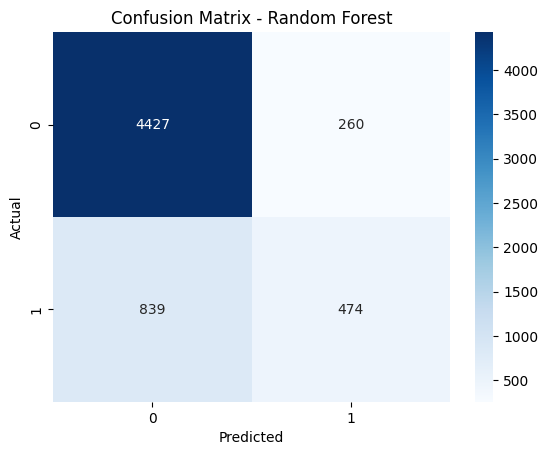

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


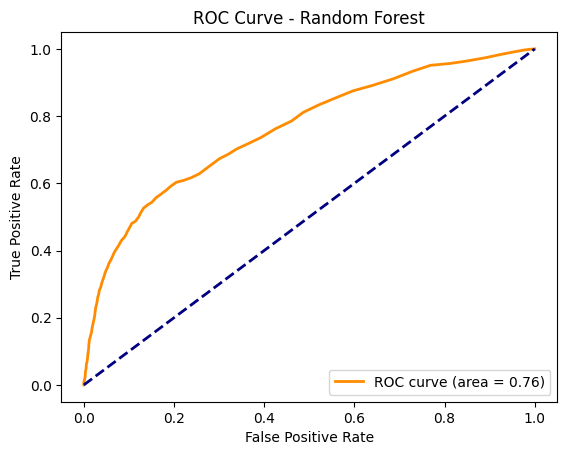

In [ ]:
# ROC Curve
y_score_rf = rf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 100}


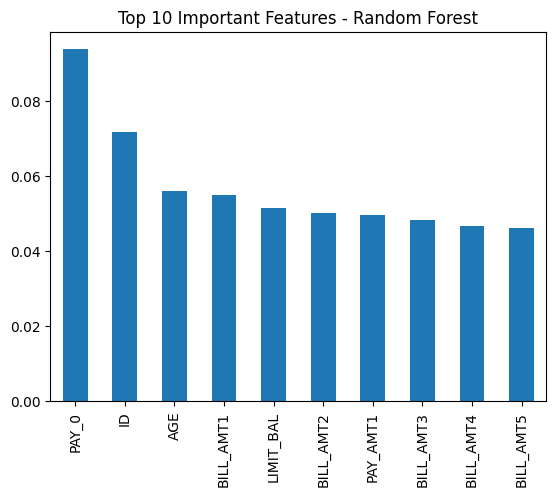

In [ ]:
# Các đặc trưng quan trọng trong Random Forest
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Important Features - Random Forest')
plt.show()
